In [194]:
# Import Libraries 

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

# Read csv file into df

df = pd.read_csv(r"C:\Users\Ranz Gabor\Desktop\IT Things\Data Analyst\movies\movies.csv")

In [195]:
# Check df

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [196]:
# Check missing data and delete those with null values

print(df.isnull().sum())

df = df.dropna()

print(df.isnull().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [197]:
# Check column data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [198]:
# Check if there are any decimal values in the float columns with .0 

df_check = (df[['votes', 'budget', 'gross', 'runtime']] % 1) > 0

# Filter rows where any of these columns have decimal values
df_filtered = df[df_check.any(axis=1)]

print(df_filtered)


Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


In [199]:
# No decimals found in the previous line
# Change Data Types of previous columns to int

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [200]:
# Check if the year in released column matches the value in the year column

df['release_year'] = df['released'].str.extract(r'(\d{4})').astype('int64')

df['year_match'] = df['year'] == df['release_year']

print(df[df['year_match'] == False])

                                  name     rating      genre  year  \
8                          Superman II         PG     Action  1980   
11              The Gods Must Be Crazy         PG  Adventure  1980   
21                       Heaven's Gate          R  Adventure  1980   
33    Cattle Annie and Little Britches         PG      Drama  1980   
96                       The Evil Dead      NC-17     Horror  1981   
...                                ...        ...        ...   ...   
7427                      Stan & Ollie         PG  Biography  2018   
7432          Dragon Ball Super: Broly         PG  Animation  2018   
7462                              1917          R      Drama  2019   
7525               Weathering with You      PG-13  Animation  2019   
7604                            Mine 9  Not Rated      Drama  2019   

                               released  score   votes          director  \
8         June 19, 1981 (United States)    6.8  101000    Richard Lester   
11     

In [201]:
# Some have False year_match values, so we choose the release_year as the correct year

df['year'] = df['release_year']

df['year_match'] = df['year'] == df['release_year']

print(df[df['year_match'] == False])

df = df.drop(columns=['release_year','year_match'])

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, release_year, year_match]
Index: []


In [202]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
2434,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
3681,Ginger Snaps,Not Rated,Drama,2001,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


In [203]:
# Check if there are any duplicate rows

df.duplicated().sum()

0

In [204]:
# Correlation between numerical features using different methods 

print("Pearson:")
print(df.corr(numeric_only=True, method='pearson'))
print("\nKendall:")
print(df.corr(numeric_only=True, method='kendall'))
print("\nSpearman:")
print(df.corr(numeric_only=True, method='spearman'))

# Gross vs Budget correlations:
# Pearson ~ 0.740
# Kendall ~ 0.512
# Spearman ~ 0.693

Pearson:
             year     score     votes    budget     gross   runtime
year     1.000000  0.061923  0.203098  0.320312  0.268721  0.075294
score    0.061923  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.203098  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.320312  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.268721  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075294  0.414068  0.352303  0.318695  0.275796  1.000000

Kendall:
             year     score     votes    budget     gross   runtime
year     1.000000  0.043400  0.293044  0.213719  0.232372  0.064793
score    0.043400  1.000000  0.350185 -0.006406  0.124943  0.292254
votes    0.293044  0.350185  1.000000  0.346274  0.553625  0.205344
budget   0.213719 -0.006406  0.346274  1.000000  0.512057  0.231278
gross    0.232372  0.124943  0.553625  0.512057  1.000000  0.176979
runtime  0.064793  0.292254  0.205344  0.231278  0.176979  1.000000

Spearman:
             year 

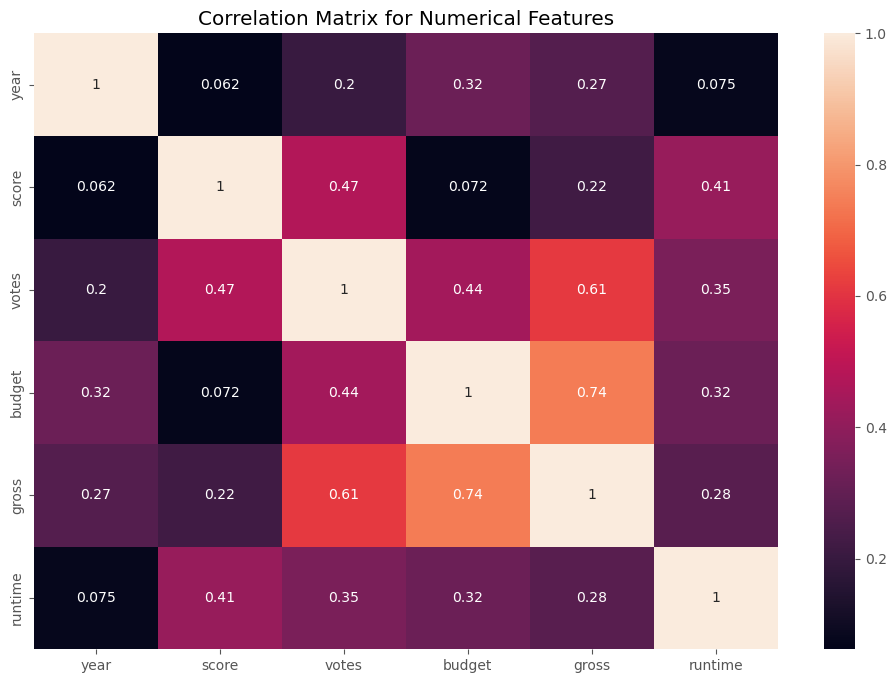

In [205]:
# Create a heatmap for the correlation matrix between numerical values

correlation_matrix = df.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In [206]:
# Features with high correlations

sorted_pairs = correlation_matrix.unstack().sort_values()

# Convert Series to DataFrame
sorted_pairs = sorted_pairs.reset_index()
sorted_pairs.columns = ['feature_1', 'feature_2', 'correlation']

# Remove duplicate pairs
unique_pairs = sorted_pairs[
    (sorted_pairs['feature_1'] < sorted_pairs['feature_2'])
]

# Include only pairs with corr > 0.5 and not equal to 1
high_corr = unique_pairs[np.logical_and(unique_pairs['correlation'] > 0.5, unique_pairs['correlation'] != 1)]

high_corr

,feature_1,feature_2,correlation
26,gross,votes,0.614751
28,budget,gross,0.740247


In [207]:
# Budget and Votes features have high correlations to Gross with Pearson method.